<a href="https://colab.research.google.com/github/rick1270/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/RClayton_Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
X = df['sqft_living'].values[:, np.newaxis]
y = df['price'].values
print(X.shape)
print(y.shape)


(21613, 1)
(21613,)


In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

print(X.shape, "\n")

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)



(21613, 1) 

(10806, 1)
(10807, 1)
(10806,)
(10807,)


In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)


m_hat = model.coef_[0]
b_hat = model.intercept_
print(m_hat)
print(b_hat)

268.42931803060935
-20631.156554487883


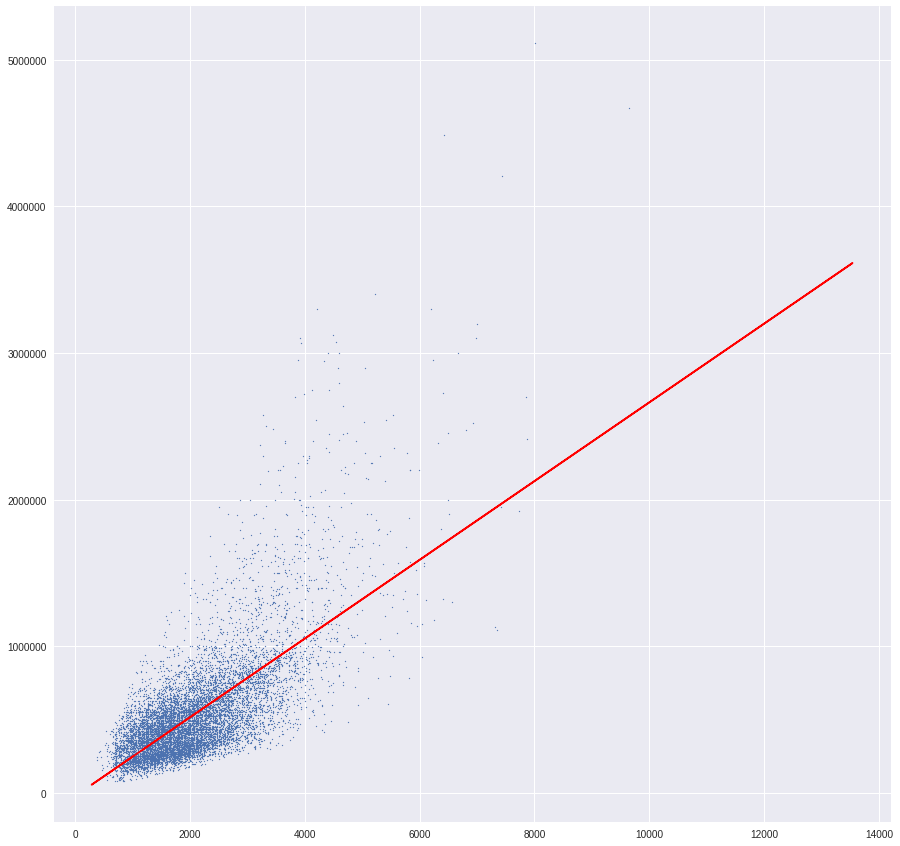

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.scatter(X_train, Y_train, s=1)
y_hat = [m_hat*x + b_hat for x in X]
plt.plot(X, y_hat, 'red');

In [6]:
from sklearn.metrics import mean_squared_error, r2_score
y_test_predict = model.predict(X_test)
MSE = mean_squared_error(Y_test, y_test_predict)
RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('MSE is {}'.format(MSE))
print('RMSE os {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)

print('R^2 is {}'.format(R2))

MSE is 75628624138.70985
RMSE os 275006.58926416625
R^2 is 0.49226256935760826


# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [7]:
y = df.loc[:, ['price']].values
X = df.loc[:, ['sqft_living', 'yr_built']].values
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

print(X.shape, "\n")

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(y.shape)
print(X.shape)
model = LinearRegression()
model.fit(X, y)
beta_0 = model.intercept_
beta_i = model.coef_[0]
print('Slope Coefficients: ', beta_i)
print('\nIntercept Value: ', model.coef_[0])
           
           

(21613, 2) 

(10806, 2)
(10807, 2)
(10806, 1)
(10807, 1)
(21613, 1)
(21613, 2)
Slope Coefficients:  [  304.56520719 -2353.73193233]

Intercept Value:  [  304.56520719 -2353.73193233]


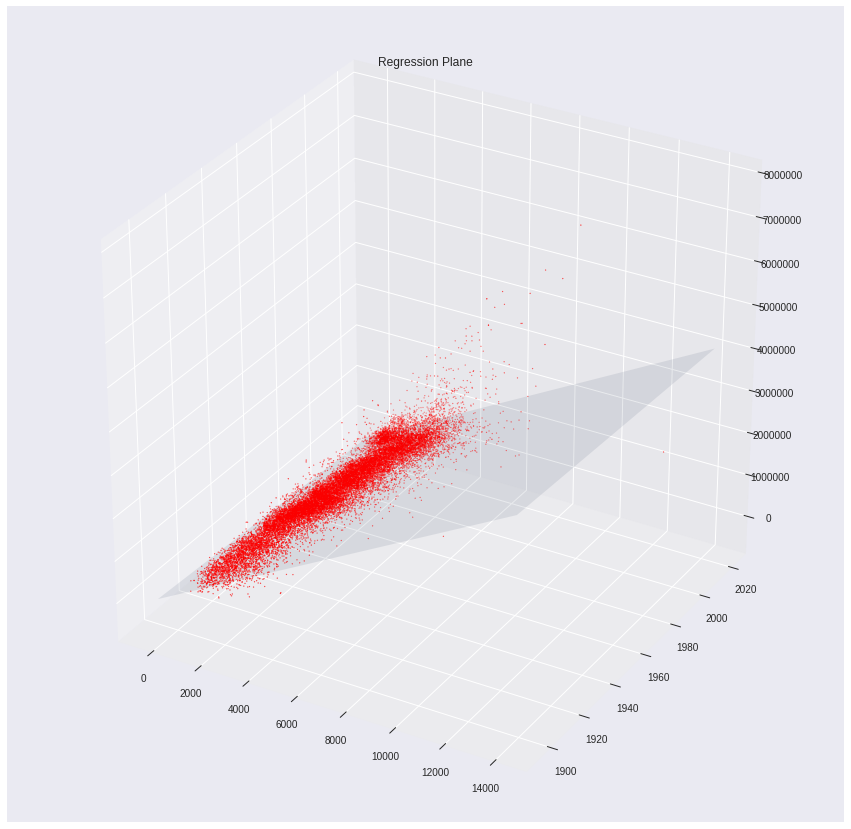

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['sqft_living'], df['yr_built'], df['price'],c='red', s = 1)

# Set axes to size of scatter data
x1 = np.array(ax.get_xlim())
y1 = np.array(ax.get_ylim())
xx, yy = np.meshgrid(x1,y1)
zz = beta_i[0]*xx + beta_i[1]*yy + beta_0[0]

# Plot Plane
plt3d = plt.gca(projection='3d')

# Add Opacity to Plane 
plt3d.plot_surface(xx, yy, zz,alpha=0.1)
plt.title("Regression Plane")

plt.show()

In [9]:
y_test_predict = model.predict(X_test)
MSE = mean_squared_error(Y_test, y_test_predict)
RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('MSE is {}'.format(MSE))
print('RMSE os {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)

print('R^2 is {}'.format(R2))

MSE is 70328211836.08578
RMSE os 265194.6678123182
R^2 is 0.5278472141204659


# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [12]:
y = df.loc[:, ['price']].values
X = df.loc[:, ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']].values
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

print(X.shape, "\n")

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(y.shape)
print(X.shape)
model = LinearRegression()
model.fit(X, y)
beta_0 = model.intercept_
beta_i = model.coef_[0]
print('Slope Coefficients: ', beta_i)
print('\nIntercept Value: ', model.coef_[0])

(21613, 18) 

(10806, 18)
(10807, 18)
(10806, 1)
(10807, 1)
(21613, 1)
(21613, 18)
Slope Coefficients:  [-3.57665414e+04  4.11442785e+04  1.10442865e+02  1.28597869e-01
  6.68955012e+03  5.82960458e+05  5.28709424e+04  2.63856491e+04
  9.58904452e+04  7.07852244e+01  3.96576400e+01 -2.62022321e+03
  1.98125837e+01 -5.82419866e+02  6.02748226e+05 -2.14729828e+05
  2.16814005e+01 -3.82641850e-01]

Intercept Value:  [-3.57665414e+04  4.11442785e+04  1.10442865e+02  1.28597869e-01
  6.68955012e+03  5.82960458e+05  5.28709424e+04  2.63856491e+04
  9.58904452e+04  7.07852244e+01  3.96576400e+01 -2.62022321e+03
  1.98125837e+01 -5.82419866e+02  6.02748226e+05 -2.14729828e+05
  2.16814005e+01 -3.82641850e-01]


In [13]:
y_test_predict = model.predict(X_test)
MSE = mean_squared_error(Y_test, y_test_predict)
RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('MSE is {}'.format(MSE))
print('RMSE os {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)

print('R^2 is {}'.format(R2))

MSE is 46042957988.37893
RMSE os 214576.228852077
R^2 is 0.6908877630073212


# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- Write a blog post explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
